# Assignment #4 - Neural Networks

### <font color="red"> DUE: Nov 18 (Saturday) 11:00 pm </font>  

<font color="blue"> Poorna Chandrika Maddisetty</font>

# I. Objective

The objective of this assignment is to build a neural network with a regression model to make it non-linear and apply on a regression data. The dataset chosen is Appliances Energy Prediction dataset. A neural network with 27 nodes input nodes and only 1 output node will be constructed in this assignment

# II. Data

## Description of Data for Regression

The data set I chose for regression is appliances energy prediction. It is all about the energy consumption of the appliances used in a low energy building. It contains 19375 instances and 29 attributes. The data is gathered about 10 min in 4.5 months. The temperature levels and the humidity conditions in different rooms of the house was monitered using ZigBee wireless sensor network.

Also the data from the nearest airport weather station has been collected and merged with the data sets using the ddate and time column.

The data has a date attribute indicating the timestamp at which this is recorded, Appliances atribute indicating the energy use of all appliances in the house in Wh, light indicates the total energy with the use of light fixtures in the house, T1-T9 are the temperature values recorded in the rooms. Rh_1 to Rh_9 are the humidity conditions in different rooms.Also the pressure, humidity, visibility , Tdewpoint are columns merged with the help of weather station data. Also two random varibles have been included in the data set. The goal is to remove all the indepenent features and effecitively predict the data

# SOURCE OF DATA

I gathered this dataset from the UCI respository

https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

# READING THE DATA

I am using the pandas library to read the data set and matplot lib and seaborn to visually represent the data and relationships between them

In [309]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [310]:
df = pd.read_csv("energydata_complete.csv", parse_dates=['date'])

# PREPROCESSING OF THE DATA


<br>Handling the null values and handling the strings are the basic steps to perform to make the data ready for the process and apply the machine learning algorithm . Null values in the data can be checked using the numpy library.<br>

In [311]:
np.any(df.isnull())

False

# VISUALIZATION OF THE DATA

<br>As my data do not contain any null values, and any categorical values my pre processing step was easier. To visualise the data I am using bar graphs, scatterplots, violinplots, pointplots and pairplots to represent the relationship between the attributes <br>

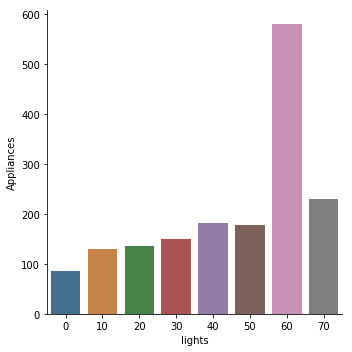

In [312]:
sb.catplot(x="lights", y="Appliances", data=df, saturation=.5, ci=None, kind="bar")

In [313]:
df2=df.groupby(df['date'].dt.strftime('%B'))['Appliances'].sum().sort_values()
df2

date
January     283510
May         362950
February    421550
April       427200
March       432800
Name: Appliances, dtype: int64

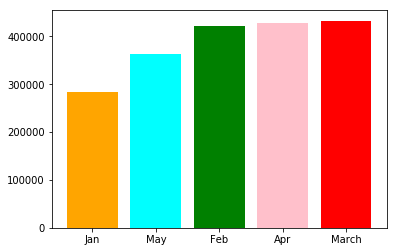

In [314]:
months = ["Jan","May","Feb","Apr","March"]
dataplt = plt.bar(months,df2,color=['orange', 'cyan', 'green', 'pink', 'red'])

In [315]:
df3=df.groupby(df['date'].dt.strftime('%B'))['lights'].sum().sort_values()
df3

date
May          6820
April       10440
January     13800
March       17480
February    26490
Name: lights, dtype: int64

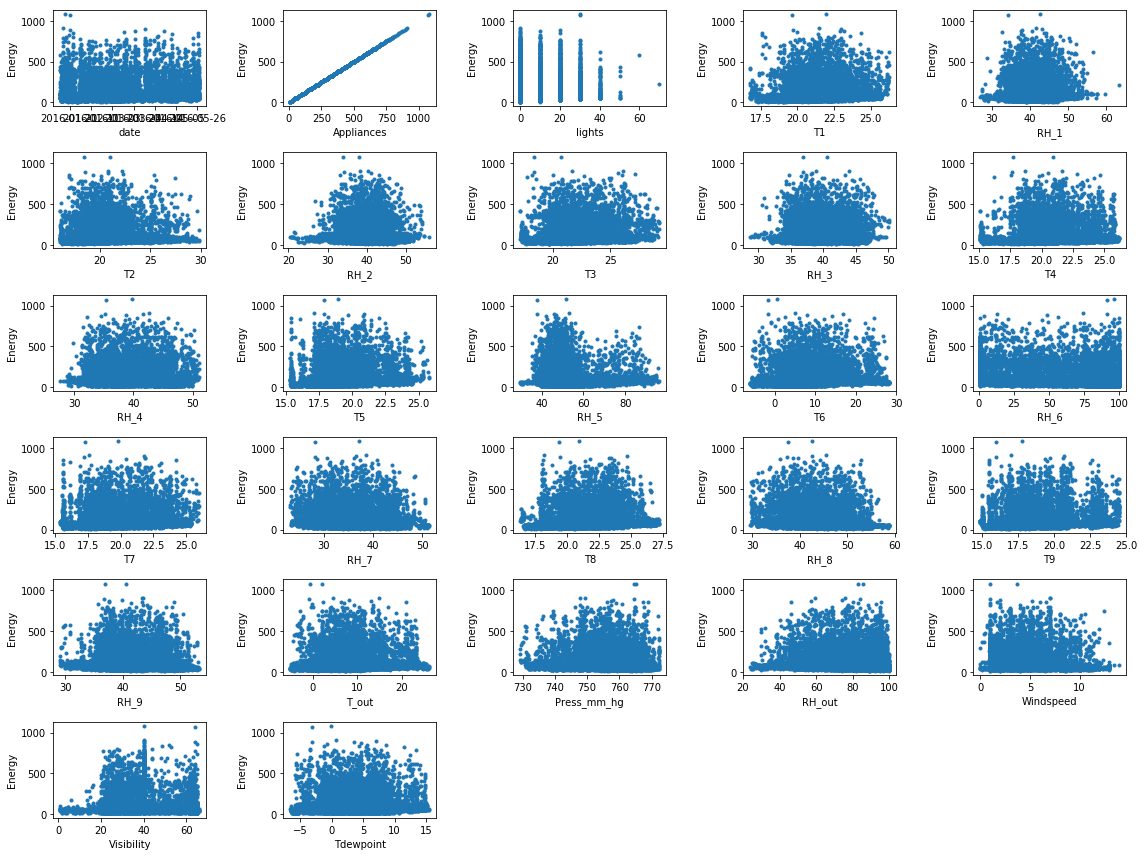

In [316]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(27):
    plt.subplot(6, 5, i+1)
    plt.plot(df.iloc[:,i],df.Appliances, '.')
    plt.xlabel(df.columns.values[i])
    plt.ylabel("Energy")
fig.tight_layout()

In [317]:
bins = [0, 1, 5, 10, 25, 50, 100]
df['Energy'] = pd.cut(df['Appliances'], bins)

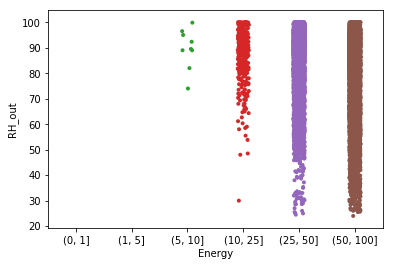

In [318]:
sb.stripplot(x="Energy",y="RH_out", data=df ,size=4)

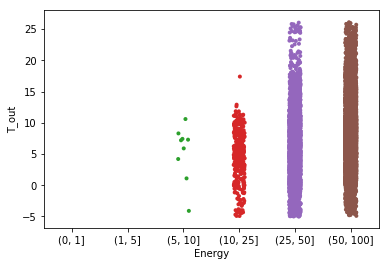

In [319]:
sb.stripplot(x="Energy", y="T_out", data=df, size=4)

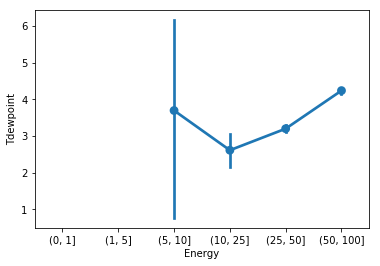

In [320]:
sb.pointplot(x="Energy", y="Tdewpoint", data=df)

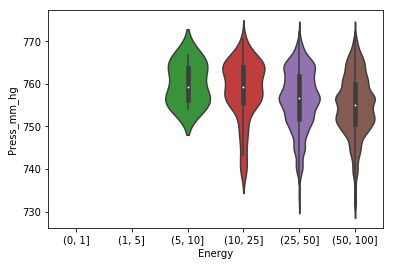

In [321]:
sb.violinplot(x="Energy", y="Press_mm_hg", data=df)

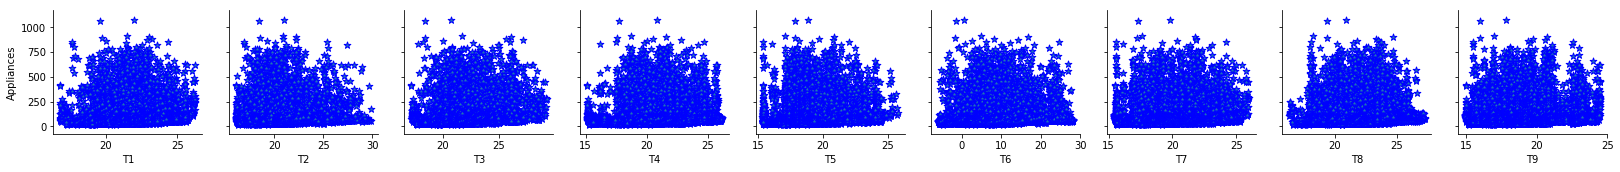

In [322]:
sb.pairplot(df, x_vars=["T1","T2","T3","T4","T5","T6","T7","T8","T9"], y_vars=["Appliances"], markers="*",plot_kws=dict(s=50, edgecolor="b", linewidth=1), diag_kws=dict(shade=True))

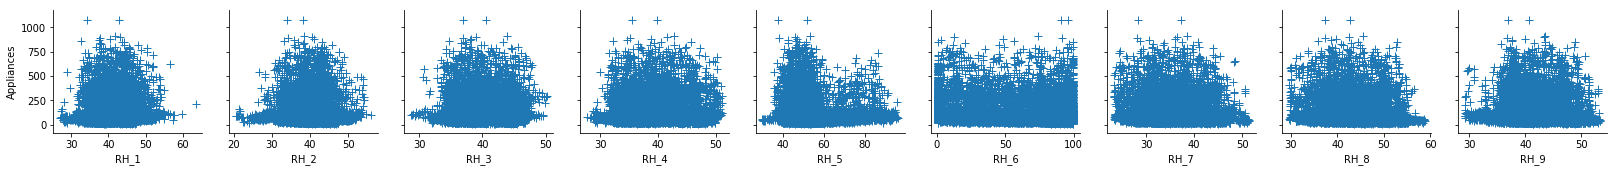

In [323]:
sb.pairplot(df, x_vars=["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"], y_vars=["Appliances"], markers="+",plot_kws=dict(s=50, edgecolor="b", linewidth=1), diag_kws=dict(shade=True))

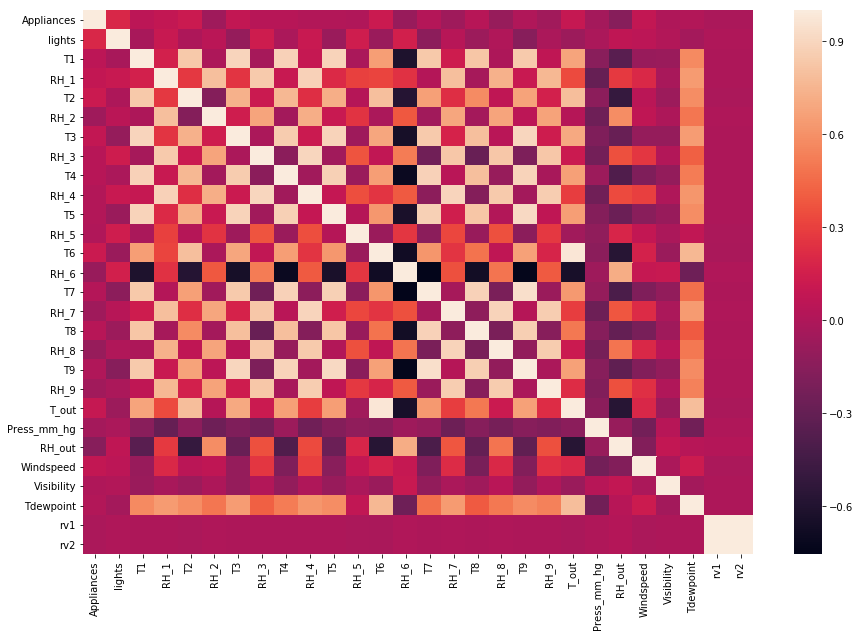

In [324]:
plt.figure(figsize=(15,10))
sb.heatmap(df.corr())

# PRELIMINARY OBSERVATION

<br>Based on the folowwing visualizations I oberved the following information.By using various models as we progress we will be able to predict the exact value and the variables dependent to calculate the energy usage. <br>

1. The energy usage is very high during the month of march, but there is no specific pattern that cana be observed based on monthly energy distribution, Similarly for the light fixtures distribution during these months Febraury has the highest value.

2. The relation between the usage of lights and the total energy cannot be predicted here as the energy usage increases with lights up to 60 wh and then it started decreasing a little.

3. Based on the pairplots and the scatter plots it is noticeable that as the temperature is increasing the energy usage is increasing

4. Similar plots for the humidity values is plotted and as the humidity increases the energy usage is increasing

5. The values collected from the nearest weather station also had little effect on the energy usage.

6. The column Tdewpoint was constant with the increasing levels of energy and I feel that this need not to be considered for prediction

7. From the violin plots I noticed that as the pressure increases the energy usage was increasing a little

8. Similarly from the violin plot, as the windspeed increases the energy usage was decreasing.

9. The temperature and the humidty of the weather station also had effects on the energy usage and they are directly proportional in this case to the energy usage

8. All the attributes except Tdewpoint and Pressure are the dependent attributes that can be used for predicting the energy use. Also the usage of light fixtures, temperature and humidity values of various rooms play an important role while predicting<br>

# III. Methods

- Summarize the nonlinear regression model. 
- Use the NeuralNet class for regression to apply to your data. 
- Explain your codes. 
- Explain and use 5-fold cross validation to find a good neural network parameters including the structure and report the test accuracy. 

## Summary

Nonlinear regression models are those that are not linear in the parameters. In nonlinear regression, functions h are considered that can not be written as linear in the parameters. Examples of nonlinear equations are:

Y = A + B EXP(-CX)

Y = (A +BX)/(1+CX)

Y = A + B/(C+X)

Nonlinear regression is used to estimate the parameters in a nonlinear model without performing hypothesis tests. In simpler terms, If a function is not linear with respect to the weights, then it is a nonlinear regression problem. The easiest way to determine whether an equation is nonlinear is to focus on the term “nonlinear” itself.  

### Neural Networks

<img src="https://upload.wikimedia.org/wikipedia/commons/1/10/Blausen_0657_MultipolarNeuron.png" width=500/>
<center>Figure 1. Anatomy of a neuron (wikipedia) </center>

Neural networks, or artificial neural networks, are the computational models inspired by the brain. Mimicing the neurons' synaptic connecions, we build or stack multiple neuron-like hidden units to map data into nonlinear space for rich representation.

Neural Networks are typically organized in many layers where each layer consists of a number of interconnected nodes which contain a activation function. Every neural network contains an input layer, output layer and one or more hidden layers

Input layer consists of nodes that are equal to the features of the dataset and the output layer nodes are the classes or to which the entry belongs in case of classification or the result that needs. The processing in each hidden layer is unknown.

Every time the input to the hidden layer comes from the outputs of the previous layers. Hidden layers have activation function which computes the output for the next layer. 

Initially, we start from the input we have, we pass them through the network layer and calculate the actual output of the model streightforwardly. This step is referred as This step is called forward-propagation, because the calculation flow is going in the natural forward direction from the input -> through the neural network -> to the output.

Based on the error we recieve we update thw weights and bias of the network. This step is called back propogation where it updates the weights.

This follows the below flow:

Input -> Forward calls -> Loss function -> derivative -> backpropagation of errors.

Ex: consider the simple linear example: where we multiply the input 3 times to get a hidden layer, then the hidden layer is multiplied 2 times to get the ouput

input -> 3.x -> 2.x -> output.

A 0.001 delta change on the input, will be translated to a 0.003 delta change after the first layer, then to 0.006 delta change on the output.

When both the above functions are written to one it is:

input -> 6.x -> output.

Similarly an error on the output of 0.006, can be backpropagated to an error of 0.003 in the middle hidden stage, then to 0.001 on the input.
 

In [325]:
# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 

In [326]:
""" Neural Network 
        referenced NN code by Chuck Anderson in R and C++ 

                                by Jake Lee (lemin)

    example usage:
        X = numpy.array([0,0,1,0,0,1,1,1]).reshape(4,2)
        T = numpy.array([0,1,1,0,1,0,0,1]).reshape(4,2)

        nn = nnet.NeuralNet([2,3,2])
        nn.train(X,T, wprecision=1e-20, fprecision=1e-2)
        Y = nn.use(X)

"""
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

## Explanation of Codes

The classes listed above Standardizer class and Neural Net class. The Standardizer class focusses on normalizing all the values and the NeuralNet class aims in building the neural network and accomplishing the forward and backward pass.

This function takes the the number of inputs, hidden units, and outputs as the three parameters

The set_hunit function is used to either update or initiate the weights.It takes the weight value as the parameter.

The Pack function packs the multiple weights of each layer into one vector. The unpack function is viceversa to this.

In the forward pass the following is performed in case of regression:

$$
\begin{align}
Z &= h(Xl \cdot V) \\
\\
Y & = Zl \cdot W 
\end{align}
$$

The tanh function is used as the activation function. 

In the backward pass the function takes the the z values, Target values and the error as input and based on the delta value, the weights and the bias are updated accoringly. This method returns the weight vector packed together of that particualr layer.

$$
\begin{align}
V &\leftarrow V + \alpha_h \frac{1}{N} \frac{1}{K} Xl^\top \Big( (T - Y) W^\top \odot (1 - Z^2) \Big) \\
W &\leftarrow W + \alpha_o \frac{1}{N} \frac{1}{K} Zl^\top \Big( T - Y \Big) 
\end{align}
$$

The train function takes the feautures and the target as the input, Standardizes the input. The gradientf function proceeds with the forward pass. Based on the error computed it makes a call to the back propogation method and recieves the weight vector.
The optimtarget function tries to reduce the error by using the object function and update the weights accordingly.

The use method is applied to the test data after training the model.It standardizes the target and X values and computes the result.

In [327]:
df = pd.read_csv("energydata_complete.csv", parse_dates=['date'])

In [328]:
T=df.iloc[:,1];
T=np.array(T)
T=T.reshape(T.size,1)
T

array([[ 60],
       [ 60],
       [ 50],
       ...,
       [270],
       [420],
       [430]], dtype=int64)

In [329]:
X = df
X = X.drop('Appliances',axis=1)
X= X.drop('date',axis=1)
X= X.drop('rv1',axis=1)
X= X.drop('rv2',axis=1)
X.shape

(19735, 25)

In [330]:
from sklearn.model_selection import train_test_split
X_tr, X_test, T_tr, T_test = train_test_split(X, T, test_size = 0.33, random_state = 5)

In [331]:
Trlog = np.log(T_tr + 1)
Tslog = np.log(T_test+1)

In [332]:
nn = NeuralNet([25,6,1])

In [333]:
nn.train(X_tr,Trlog, Lambda =0. ,wprecision=1e-20, fprecision=1e-2)

{'w': array([ 0.0776755 , -0.04879116,  0.04480757, -0.02528632,  0.03978484,
         0.08239175,  0.08347527, -0.00474042,  0.01561878, -0.08536264,
        -0.05183652,  0.11164957, -0.09519482, -0.03895766, -0.10022555,
         0.01163659, -0.07293685, -0.07919036, -0.05179183, -0.0009741 ,
         0.06992095, -0.08912988,  0.06500337, -0.06305674, -0.0908273 ,
        -0.02632308, -0.00840866, -0.0633367 ,  0.07650682,  0.07896877,
         0.07448923, -0.03445518,  0.08401627, -0.01334275, -0.0078626 ,
        -0.09385848, -0.01613832, -0.0228607 , -0.03663606, -0.03917322,
         0.03355252,  0.11495809, -0.05216672, -0.01296324, -0.06884645,
         0.0410063 ,  0.03131434,  0.00054908, -0.08706756,  0.0821157 ,
        -0.01104878, -0.01928874, -0.0229368 , -0.07444489,  0.0708519 ,
         0.09714545, -0.09163562,  0.00993358, -0.08762758, -0.09807448,
         0.05412407,  0.04748043,  0.06996861, -0.01831499,  0.00020081,
        -0.04378306, -0.04511752, -0.04444273,

In [334]:
Ypred = nn.use(X_test)
Ypred

array([[4.31259328],
       [4.32463318],
       [4.33496163],
       ...,
       [4.32969845],
       [4.31554901],
       [4.32575834]])

In [335]:
E = Tslog-Ypred
E

array([[ 0.30252724],
       [-0.39280755],
       [-0.90097442],
       ...,
       [ 1.41009446],
       [-0.20467514],
       [-0.21488447]])

In [336]:
meanerr = np.sqrt(np.mean((Tslog-Ypred)**2))
meanerr

0.6466529525163214

In [337]:
from sklearn.metrics import r2_score
r2_score(Tslog, Ypred)

0.007431325364402608

## Cross Validation

In [338]:
def split_kfold(data, kval):
    n = len(data)/kval
    dataval =[]
    val =0
    for i in range(kval):
       dataval.append(data[int(val):int(val+n)])
       val=val+n
    return dataval

In [339]:
def crossvalidate(xlist,tlist, nns,optim):
    init =0
    next =0
    nnval=0
    rmse=0.0
    rmselist =[]
    
    paramslist =[]
    for init in range(5):
        xtest = xlist[init]
        ttest = tlist[init]
        ttest = np.log(ttest+1)
        testlist =[]
        testparamlist =[]
        for next in range(5):
            if next == init:
                continue
            xval = xlist[next]
            tval = tlist[next]
            tval = np.log(tval+1)
            xtrain = xlist[not next and not init]
            ttrain = tlist[not next and not init]
            ttrain = np.log(ttrain + 1)
            values = np.zeros((5, 2))
            i = 0
            vallist = []
            plist = []
            for nnval in nns:
                nn = NeuralNet(nnval)
                nn.train(xtrain, ttrain, optim = optim, wprecision=1e-20, fprecision=1e-2)
                pred = nn.use(xval)
                rmse = np.sqrt(np.mean((tval-pred)**2))
                vallist.append(rmse)
                plist.append(nnval)
 
            rmsavgin = vallist.index(min(vallist))
 
            testlist.append(vallist[rmsavgin])
            testparamlist.append(plist[rmsavgin])

        minval = np.argmin(testlist)
        bestparams = testparamlist[minval]
        bestnn = NeuralNet(bestparams)
        xtrain = xlist[not init]
        ttrain = tlist[not init]
        ttrain = np.log(ttrain+1)
        bestnn.train(xtrain, ttrain,wprecision=1e-20, fprecision=1e-2)
        totpred = bestnn.use(xtest)
        rmsefinal = np.sqrt(np.mean((totpred - ttest)**2))
        rmselist.append(rmsefinal)
        paramslist.append(bestparams)
    return rmselist, paramslist

### Explanation of Codes

In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model.

For the above problem we have a 5 fold cross validation. I have to split my data into five parts. The first part is used as my test data, the next part I took it as my validation and the remaining three parts are used to train the neural network.

This process is repeated with all the other folds by interchanging the train, validation and test chunks.The split_kfold function helps me in splitting my data in to five equal parts.

The cross validate function helps me in partitioning the train, test and validation chunks and iterating over them.My code contains three for loops, the first lopp is used to maintain the number of folds, i.e 5 and the second loop keeps track of the validation and train data. In the third loop I am interating over my parameters to find the best parameter, validate it with the validate chunk and choosing the best parameters to apply on the test data.

After iterating through the paramters I compute the rmse values for the different parameters for each step and validate them  with the val chunk.The minimum error value is checked and the corresponding parameters are retained. These retained parameters are then applied on the test data, which finally results five rmse values and five corresponding parameters.

From the result obtained we can choose the model that has the lowest rmse error or the model whose parameters are selected fequently.At each stage I am only concentrating on the minimum rmse value and proceeding to the next iteration. So I chose the model that gave me the lowest error of all the parametrs applied



In [340]:
nns = [[25,3,1],[25,4,1], [25,8,1], [25,11,1], [25,6,1], [25,15,1], [25,20,1],[25,25,1],[25,30,1]]
xlist = split_kfold(X,5)
tlist = split_kfold(T,5)
optim ='steepest'
optim2 ='scg'
datav, datav2 = crossvalidate(xlist,tlist,nns,optim2)
datav3, datav4 = crossvalidate(xlist,tlist,nns,optim)

In [341]:
datav, datav2

([0.7616929671463926,
  0.6637574020750298,
  0.6408848135314108,
  0.6571769247228105,
  1.1114766052094458],
 [[25, 4, 1], [25, 3, 1], [25, 8, 1], [25, 25, 1], [25, 25, 1]])

#### Best Parameters 

In [342]:
finalindex= np.argmin(datav)
bestparams = datav2[finalindex]
bestrmse = datav[finalindex]

bestrmse, bestparams

(0.6408848135314108, [25, 8, 1])

# IV - Results

- Presents the results of comparison of the tested models.
- Visualize the results 
- What do you think about the results? 

In [343]:
nn = NeuralNet([25,6,1])

In [344]:
nn.train(X_tr,Trlog, Lambda =0. ,wprecision=1e-20, fprecision=1e-2)

{'w': array([ 0.01167755,  0.06452905, -0.04120421, -0.01980349, -0.07245977,
         0.07629422, -0.31331656,  0.19654717, -0.20212876, -0.42554411,
         0.09380649, -0.00293603, -0.08360655,  0.02637894, -0.11584508,
        -0.0159106 ,  0.06195077, -0.03670174, -0.09744751,  0.05496978,
        -0.03877979, -0.18601264,  0.01006988,  0.04763867, -0.12801087,
         0.14027677, -0.18907884, -0.09108699,  0.08852906,  0.14180068,
        -0.11133299, -0.09822673,  0.13831665,  0.11023392, -0.01392087,
        -0.06981608, -0.15000895,  0.15912677, -0.15251288, -0.09377317,
         0.0449209 ,  0.02591275, -0.17720638,  0.08092275, -0.09797012,
        -0.05635922,  0.03839192,  0.045436  ,  0.13210774,  0.10574597,
        -0.09767243,  0.04387783,  0.13643269,  0.03440733,  0.02133539,
        -0.01882223,  0.01454654,  0.00974879,  0.07405794, -0.07924548,
        -0.02648236,  0.07363609, -0.05541687,  0.04496825,  0.0777345 ,
        -0.03266436, -0.04607152, -0.02137363,

In [345]:
Ypred = nn.use(X_test)
Ypred

array([[3.97466914],
       [3.87903381],
       [3.94770379],
       ...,
       [4.71768549],
       [4.00665217],
       [4.3404256 ]])

In [346]:
E = Tslog-Ypred
E

array([[ 0.64045138],
       [ 0.05279182],
       [-0.51371659],
       ...,
       [ 1.02210742],
       [ 0.10422169],
       [-0.22955173]])

In [347]:
np.sqrt(np.mean((Tslog-Ypred)**2))

0.5775542326163758

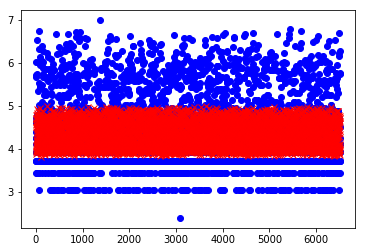

In [348]:
plt.plot(Tslog, 'ob')
plt.plot(Ypred, 'xr')

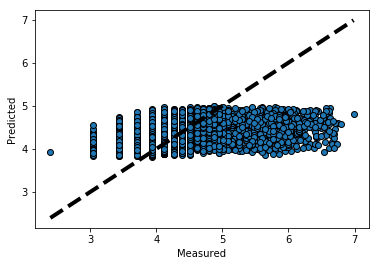

In [349]:
fig, ax = plt.subplots()
ax.scatter(Tslog, Ypred, edgecolors=(0, 0, 0))
ax.plot([Tslog.min(), Tslog.max()], [Tslog.min(), Tslog.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

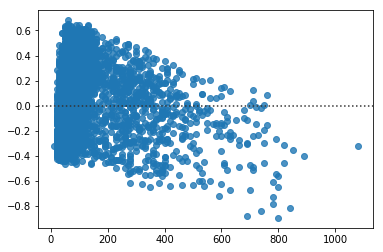

In [350]:
sb.residplot(T_test,Ypred)

Text(0.5,1,'Error rates of both optims')

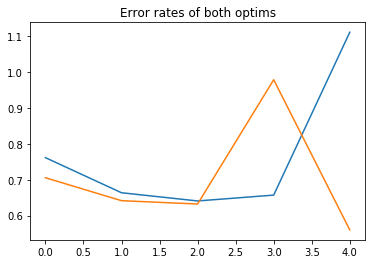

In [351]:
plt.plot(datav)
plt.plot(datav3)
plt.title('Error rates of both optims')

Text(0.5,1,'Error rates of five folds')

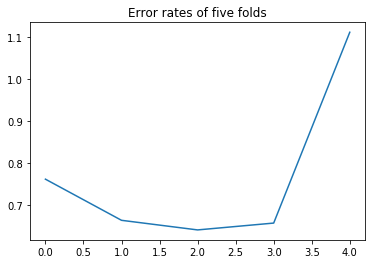

In [352]:
plt.plot(datav)
plt.title('Error rates of five folds')

In [307]:
nns = [[25,5,3,1],[25,7,5,1], [25,8,5,3,1], [25,10,6,4,2,1],[25,15,10,8,5,3,2,1]]
xlist = split_kfold(X,5)
tlist = split_kfold(T,5)
optim ='steepest'
optim2 ='scg'
datav, datav2 = crossvalidate(xlist,tlist,nns,optim2)
datav,datav2

([0.7698879680352224,
  0.6602234747048126,
  0.6410322134755897,
  0.6225988240359539,
  0.6028518329868088],
 [[25, 5, 3, 1],
  [25, 7, 5, 1],
  [25, 15, 10, 8, 5, 3, 2, 1],
  [25, 7, 5, 1],
  [25, 7, 5, 1]])

In [308]:
nns = [[25,30,20,1],[25,40,50,1], [25,20,25,30,1], [25,25,35,4,2,1],[25,6,1]]
xlist = split_kfold(X,5)
tlist = split_kfold(T,5)
optim ='steepest'
optim2 ='scg'
datav, datav2 = crossvalidate(xlist,tlist,nns,optim2)
datav,datav2

([0.7140422088805349,
  0.6553971254087575,
  0.6342199266706353,
  0.7063130181105544,
  0.5842963439858019],
 [[25, 30, 20, 1],
  [25, 40, 50, 1],
  [25, 20, 25, 30, 1],
  [25, 40, 50, 1],
  [25, 30, 20, 1]])

## Parameter/Network Structure Choice

Intitally I trained my network with only one hidden layer, increasing the number of neurons in each iteration and checking the rmse values and trying to get the model with lowest rmse values.

The parameters I tried to use with single layer is : 

nns = [[25,3,1],[25,4,1], [25,8,1], [25,11,1], [25,6,1], [25,15,1], [25,20,1],[25,25,1],[25,30,1]]

Out of the above network structures I chose is a simple neural network with only one hidden layer and the size of the neurons is 6. I preferred to chose this network because my rmse value for this network was low when compared to the other netowrks. The lowest rmse value I got was 0.5410

I tried to increase the number of neurons in the hidden layer, increase the number of hidden layers, change the optim method. But the neural network with only one hidden layer and six neurons was the clear winner of all.

The layers I applied are:

nns = [[25,5,3,1],[25,7,5,1], [25,8,5,3,1], [25,10,6,4,2,1],[25,15,10,8,5,3,2,1]]

When tried changing the values of the optim, scg gave me the best rmse value with less number of neurons but steepest took 30 neurons in the hidden layer to give the similar rmse value

Comparing small neural network with deep:

I tried comparing both the neural network parameters listed above and I noticed that the error values are high and for the other models and [25,6,1] did not find its place as the lowest error method.

With increasing number of neurons my model is over fitting but if I try to increase more number of neurons in each layer I am able to decrease it a little. But I feel that [25,6,1] was the best parameter for my model.

## Prediction Results & Lessons learnt

My non linear regression model showed the lowest rmse value of 0.55. WHen I tried to increase the hidden layers the rmse value was increased. When predicting the same value using linear regression model, my rmse value was 0.322. In this case neural network was a clear winner.

The least mean squares linear model, gave me an error value of 0.65 and my r2score was 0.17 which is less when compared with the neural network with 0.55 rmse and 0.24 r2 score.

Also the optimizer 'scg' was better when compared to the steepest because it gave me results with very less number of neurons i.e, with less computational overhead. In addition to that as I increased my number of neurons, I noticed that the model is overfitting

Also the steepest optimzer gave me less rmse error as the number of neurons increased. This can be observed above with the steepest optimizer my neurons was 30.

The intersting observation I noticed was that with morderate number of neurons, my neural network is yielding the same performance as the Least Mean Squares linear model.

#### Comparison of Linear VS Non Linear

In general Linear regression is easier to use, simpler to interpret, and helps us in getting more statistics to assess the model. While linear regression can model curves, it is relatively restricted in the shapes of the curves that it can fit.

Nonlinear regression can fit many more types of curves, but it can require more effort both to find the best fit and to interpret the role of the independent variables. 

## Conclusions

I found it difficult when I tried to solve the kfold computation, as I need to take care of all the parameters and properly split and validate with all the parts of my data. Also managing the indexes of the lowest error value was difficult as I need to manage mutiple lists. 

The hidden layers concept was intersting. The back propogation and forward pass of the neural network was intersting. My data has the energy values which are high in range.Even after normalizing my data, there was no improvement with the rmse error on the whole. It was challenging for me to manage the huge rmse values and compare them.

ForestFires workbook helped me in accomplishing this task. I took the Log values of my data for the train and test values. This helped me to reduce the over all values which inturn reduced my rmse values

## References

https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Nonlinear_Regression.pdf
    
https://medium.com/datathings/neural-networks-and-backpropagation-explained-in-a-simple-way-f540a3611f5e
    
https://machinelearningmastery.com/k-fold-cross-validation/
    
https://stackoverflow.com/questions/2474015/getting-the-index-of-the-returned-max-or-min-item-using-max-min-on-a-list
    
https://www.geeksforgeeks.org/find-average-list-python/

http://statisticsbyjim.com/regression/choose-linear-nonlinear-regression/

# Extra Credit

One extra credit is assigned when finish the following bullets. 

- Finish the following nonlinear logistic regression class and apply to your classification data. 
- Use cross validation to discover the best model. 

In [245]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
         NeuralNet.__init__(self, nunits)
        
    
    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
                t=self.softmax(t)
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
        return (t, Z)

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        return -(np.sum(T*(np.log(Y)))+wpenalty)

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
     
        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')
                
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(X)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(X)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)
            
        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])
            
    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        Y, Z = self.forward(X)
        m=np.argmax(Y,1)
        return Y,m


In [246]:
df = pd.read_excel("default of credit card clients.xls", header=[0, 1])
df.columns=df.columns.droplevel(-2)
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [247]:
df['default payment next month'] = df['default payment next month'].replace({0: -1, 1: 1})

In [248]:
T = df.loc[:, 'default payment next month'].copy()
X = df.iloc[:, :-1].copy()


In [249]:
X.shape

(30000, 23)

In [250]:
        T = np.array(T)
        
        test_df= pd.DataFrame(T)
        one_hot2=pd.get_dummies(test_df[0])
        test_df=test_df.drop(0,axis=1)
        test_df=test_df.join(one_hot2)
        
        T =np.array(test_df)

In [251]:
from sklearn.model_selection import train_test_split
X_tr, X_test, T_tr, T_test = train_test_split(X, T, test_size = 0.30, random_state = 5)

In [252]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
nn = NeuralNetLogReg([23,7,2])
nn.train(sc.fit_transform(X_tr), T_tr,optim='scg') 


In [253]:
p,l = nn.use(sc.fit_transform(X_test))

In [254]:
def split_kfold(data, kval):
    n = len(data)/kval
    dataval =[]
    val =0
    for i in range(kval):
       dataval.append(data[int(val):int(val+n)])
       val=val+n
    return dataval

In [259]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score
def crossvalidate(xlist,tlist, nns,optim):
    init =0
    next =0
    nnval=0
    rmse=0.0
    rmselist =[]
    
    paramslist =[]
    for init in range(5):
        xtest = xlist[init]
        ttest = tlist[init]
        
        testlist =[]
        testparamlist =[]
        for next in range(5):
            if next == init:
                continue
            xval = xlist[next]
            tval = tlist[next]
            
            xtrain = xlist[not next and not init]
            ttrain = tlist[not next and not init]
            
            values = np.zeros((5, 2))
            i = 0
            vallist = []
            plist = []
            for nnval in nns:
                nn = NeuralNet(nnval)
                nn.train(xtrain, ttrain, optim = optim, wprecision=1e-20, fprecision=1e-2)
                pred = nn.use(xval)
                m=np.argmax(pred,1)
                tval1=tval[:,0]
                tval1=np.where(tval1==0,1,0)
                print(tval)
                print(m)
                rmse = f1_score(tval1, m)
                vallist.append(rmse)
                plist.append(nnval)
 
            rmsavgin = vallist.index(max(vallist))
 
            testlist.append(vallist[rmsavgin])
            testparamlist.append(plist[rmsavgin])

        minval = np.argmax(testlist)
        bestparams = testparamlist[minval]
        bestnn = NeuralNet(bestparams)
        xtrain = xlist[not init]
        ttrain = tlist[not init]
        
        bestnn.train(xtrain, ttrain,wprecision=1e-20, fprecision=1e-2)
        totpred = bestnn.use(xtest)
        m=np.argmax(totpred,1)
        ttest1=ttest[:,0]
        ttest1=np.where(ttest1==0,1,0)
        rmsefinal = f1_score(ttest1, m)
        rmselist.append(rmsefinal)
        paramslist.append(bestparams)
    return rmselist, paramslist

In [260]:
nns = [[23,3,2],[23,4,2], [23,7,2], [23,10,2] ]
xlist = split_kfold(X,5)
tlist = split_kfold(T,5)
optim ='steepest'
optim2 ='scg'
datav, datav2 = crossvalidate(xlist,tlist,nns,optim2)


[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]

C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 1]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]


C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
[0 0 0 ... 1 0 0]


C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[1 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
[1 0 0 ... 1 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]

C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]


C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 1]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]

C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]

C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



[0 0 0 ... 0 0 0]
[[1 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
[0 0 0 ... 1 0 0]
[[1 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
[0 0 0 ... 1 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]


C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]


C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
[0 0 0 ... 1 0 0]
[[1 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
[0 0 0 ... 1 0 0]
[[1 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
[0 0 0 ... 1 0 0]


C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]


C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]


C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
[0 0 0 ... 1 0 0]
[[1 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
[0 0 0 ... 0 0 0]


C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[1 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
[0 0 0 ... 1 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
[0 0 0 ... 0 0 0]


C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]

C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]

C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]
[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 0]


C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [261]:
datav,datav2

([0.05551497443389335,
  0.3430079155672823,
  0.0,
  0.33518176216882317,
  0.36384704519119343],
 [[23, 10, 2], [23, 10, 2], [23, 7, 2], [23, 7, 2], [23, 10, 2]])

In [ ]:
inalindex= np.argmin(datav)
bestparams = datav2[finalindex]
bestrmse = datav[finalindex]

bestrmse, bestparams

# Deep Learning (2 Extra Credits)


For A5 extra credits, you build a deep network with more than 5 layers using TensorFlow. 
Main task for this work is converting your neural network codes with TensorFlow and searching for good structures that works well for your data. 
This includes following tasks.

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow codes. 
- Explain how you apply your model to your data. 
- Results
  - Presents the results of applications of your deep networks.
  - Visualize the results 
  - Discuss about the choice of network structures and performance of it as you change the structures.  
  - What do you think about the results? 


## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
45 | Methods | 
 |10| Summary of Neural Networks
 |10| Explanation of codes
 |25| Cross validation codes and explanation 
35 | Results | Your Data
| 10| plots for results
| 15| Discussions about parameter/network structure choice 
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
